In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train_df = pd.read_csv('../dataset/train.csv')
test_df = pd.read_csv('../dataset/test.csv')

print(train_df.head())

   id  label                                              tweet
0   1      0   @user when a father is dysfunctional and is s...
1   2      0  @user @user thanks for #lyft credit i can't us...
2   3      0                                bihday your majesty
3   4      0  #model   i love u take with u all the time in ...
4   5      0             factsguide: society now    #motivation


In [2]:
missing_values = train_df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 id       0
label    0
tweet    0
dtype: int64


In [3]:
class_distribution = train_df['label'].value_counts()
print("Class distribution:\n", class_distribution)

Class distribution:
 0    29720
1     2242
Name: label, dtype: int64


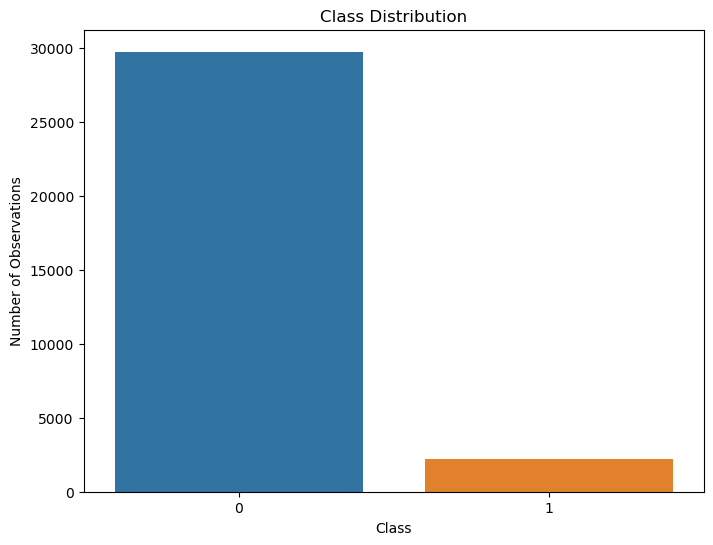

In [4]:
plt.figure(figsize=(8, 6))
sns.barplot(x=class_distribution.index, y=class_distribution.values)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Number of Observations')
plt.show()

In [5]:
train_df['text_length'] = train_df['tweet'].apply(len)
text_length_distribution = train_df['text_length'].describe()
print("Text length distribution:\n", text_length_distribution)

Text length distribution:
 count    31962.000000
mean        84.739628
std         29.455749
min         11.000000
25%         63.000000
50%         88.000000
75%        108.000000
max        274.000000
Name: text_length, dtype: float64


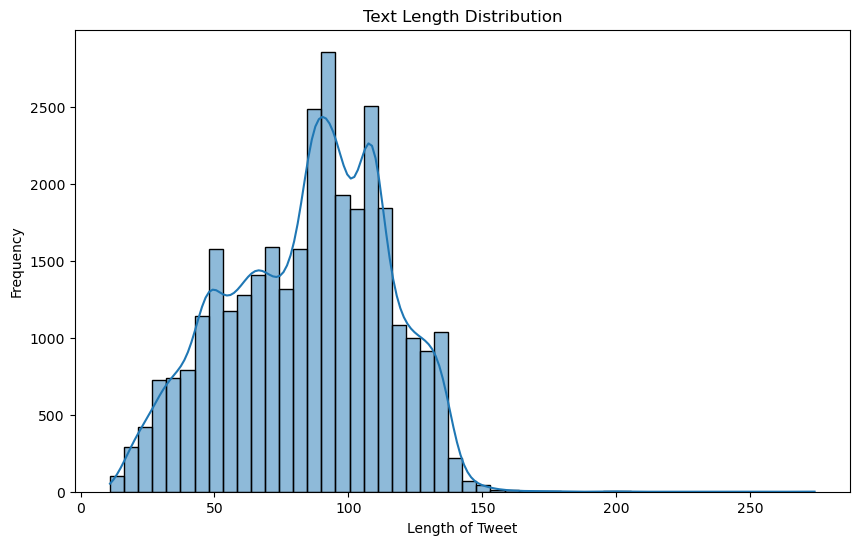

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(train_df['text_length'], bins=50, kde=True)
plt.title('Text Length Distribution')
plt.xlabel('Length of Tweet')
plt.ylabel('Frequency')
plt.show()

In [7]:
Q1 = train_df['text_length'].quantile(0.25)
Q3 = train_df['text_length'].quantile(0.75)
IQR = Q3 - Q1
outlier_threshold_low = Q1 - 1.5 * IQR
outlier_threshold_high = Q3 + 1.5 * IQR

outliers_low = train_df[train_df['text_length'] < outlier_threshold_low]
outliers_high = train_df[train_df['text_length'] > outlier_threshold_high]

print(f"Number of low outliers: {len(outliers_low)}")
print(f"Number of high outliers: {len(outliers_high)}")

Number of low outliers: 0
Number of high outliers: 9


In [8]:
print("Data Understanding Summary:")
print(f"Total observations: {train_df.shape[0]}")
print(f"Total features: {train_df.shape[1]}")
print(f"Missing values: \n{missing_values}")
print(f"Class distribution: \n{class_distribution}")
print(f"Text length distribution: \n{text_length_distribution}")
print(f"Low outliers (length < {outlier_threshold_low}): {len(outliers_low)}")
print(f"High outliers (length > {outlier_threshold_high}): {len(outliers_high)}")

Data Understanding Summary:
Total observations: 31962
Total features: 4
Missing values: 
id       0
label    0
tweet    0
dtype: int64
Class distribution: 
0    29720
1     2242
Name: label, dtype: int64
Text length distribution: 
count    31962.000000
mean        84.739628
std         29.455749
min         11.000000
25%         63.000000
50%         88.000000
75%        108.000000
max        274.000000
Name: text_length, dtype: float64
Low outliers (length < -4.5): 0
High outliers (length > 175.5): 9
